In [1]:
# Clustering(군집화)에 필요한 라이브러리를 import 한다.
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install scikit-learn
from sklearn.cluster import KMeans

Clustering이란 여러개의 데이터가 있을 때 군집화 하는 것을 의미한다.  
비슷한 데이터끼리 묶으면 관리하기 쉬운 장접이 있다. 예를들면 학원을 운영한다 했을 때 고급반, 중급반, 초급반으로 나눠 적절히 분류한다면 데이터를 확용하는 방안이 많을 것이다.  
비지도 학습(Unsupervised Learning) 알고리즘은 정확한 방향성이 일치하지 않더라도 알아서 학습이 가능한 알고리즘으로 데이터를 군집화하는 알고리즘들이 비지도 학습에 속한다. => KMeans 알고리즘이 대표적인 비지도 학습 알고리즘이다.

In [2]:
df = pd.read_csv('./data/cluster.csv')
df

x   y
0    2   3
1    2  11
2    2  18
3    4   5
4    4   7
5    5   3
6    5  15
7    6   6
8    6   8
9    6   9
10   7   2
11   7   4
12   7   5
13   7  17
14   7  18
15   8   5
16   8   4
17   9  10
18   9  11
19   9  15
20   9  19
21  10   5
22  10   8
23  10  18
24  12   6
25  13   5
26  14  11
27  15   6
28  15  18
29  18  12

In [3]:
print(list(df.index))
print(df.columns)
# values: 데이터프레임에 저장된 데이터만 넘파이 배열 형태로 얻어온다.
print(type(df.values))
points = df.values
print(points)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Index(['x', 'y'], dtype='object')
<class 'numpy.ndarray'>
[[ 2  3]
 [ 2 11]
 [ 2 18]
 [ 4  5]
 [ 4  7]
 [ 5  3]
 [ 5 15]
 [ 6  6]
 [ 6  8]
 [ 6  9]
 [ 7  2]
 [ 7  4]
 [ 7  5]
 [ 7 17]
 [ 7 18]
 [ 8  5]
 [ 8  4]
 [ 9 10]
 [ 9 11]
 [ 9 15]
 [ 9 19]
 [10  5]
 [10  8]
 [10 18]
 [12  6]
 [13  5]
 [14 11]
 [15  6]
 [15 18]
 [18 12]]


matplotlib와 seaborn 라이브러리를 이용해 Clustering을 실행할 데이터를 시각화 한다.

In [4]:
import matplotlib as mpl
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
mpl.rcParams['axes.unicode_minus'] = False

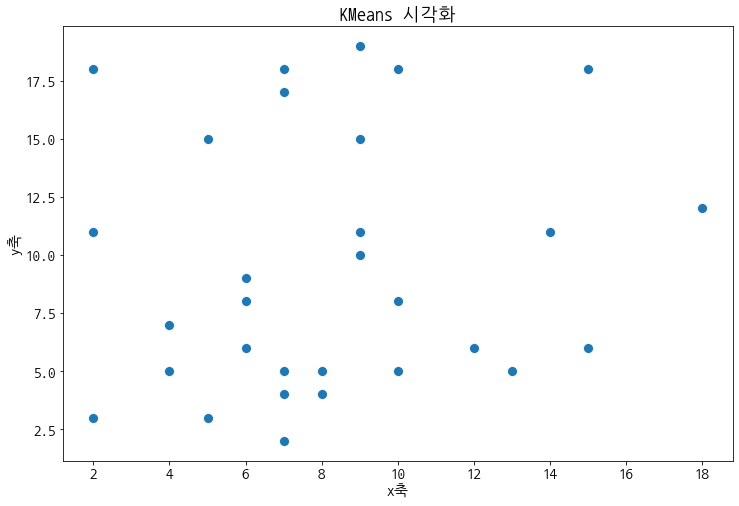

In [5]:
plt.figure(figsize=[12, 8])
sns.scatterplot(data=df, x='x', y='y', s=100)
plt.title('KMeans 시각화')
plt.xlabel('x축')
plt.ylabel('y축')
plt.show()

KMeans를 수행하기 위해서는 Clustering을 수행할 데이터의 주제를 결정하고 얼마나 많은 Cluster를 만들지 결정한 후 데이터를 준비한다.  
이 때, 데이터가 정확할 수록 유리하게 Clustering을 수행하기 위한 방법은 무작위 중심(Centroid) 값 선택, K-menns++법 등 다양한다.

무작위 중심(Centroid) 값 선택 알고리즘을 이용한 Clustering  
중심에 가까운 데이터를 Cluster에 포함시키고 중심을 Cluster의 중앙으로 이동시키는 과정을 반복해서 수행하면 되는데 더 이상 중심의 위치가 변하지 않을 때 까지 반복하는 것이 일반적이며 이러한 과정을 거치면 결과적으로 완전하게 군집화된 Cluster를 얻을 수 있다. 

In [6]:
from IPython.display import Image

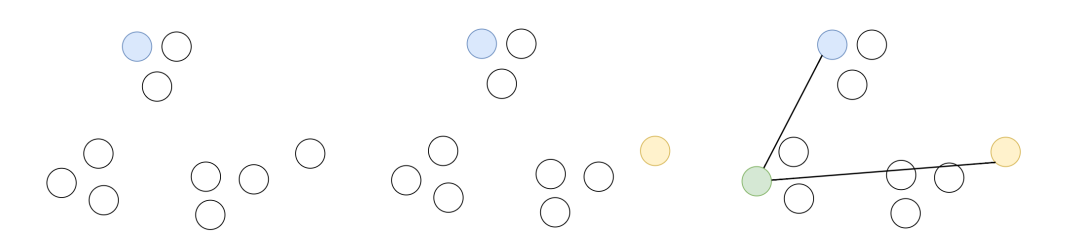

In [7]:
Image('./numpyImage/Clustering1.png', width=1200)
# 클러스터링을 위한 무작위 중심을 결정하는 방법은 가장 먼저 특정 노드(데이터)를 선택해서 클러스트의 중심으로 설정(파랑색)한다.
# 그 후에 선택된 노드에서 가장 먼 노드(노랑색)를 2번째 클러스터의 중심으로 설정한다.
# 그 다음부터는 이미 선택된 중심점들로 부터 가장 멀리있는 노드(녹색)가 중심이된다.

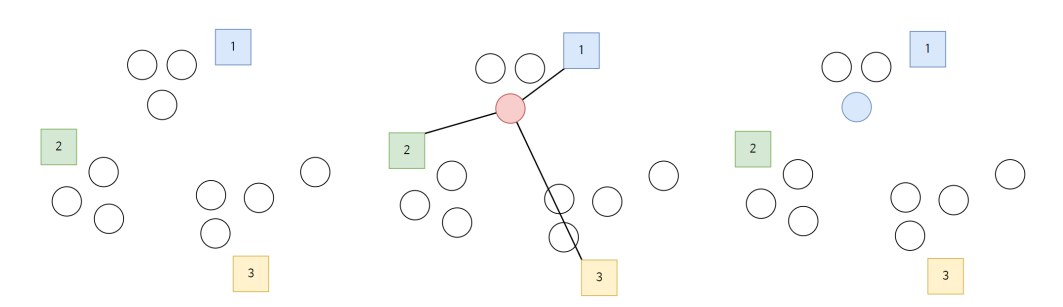

In [8]:
Image('./numpyImage/Clustering2.png', width=1200)
# 1, 2, 3 세 개의 클러스터가 존재한다고 무작위 설정을 하고 하나 하나의 데이터를 선택해서 세 개의 클러스터 중에서 가장 가까운
# 클러스터에 속하도록 한다.

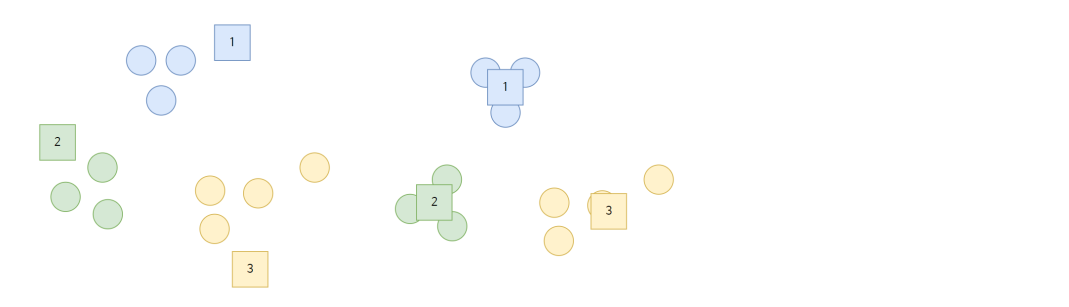

In [9]:
Image('./numpyImage/Clustering3.png', width=1200)
# 위의 과정을 전체 데이터에 대해 수행하면 아래의 그림과 같다.
# 대락적으로 군집화가 완료되면 완벽한 클러스터링을 위해 중심의 위치를 데이터 가운데로 이동시킨다.
# 중심의 위치를 이동시키고 다시 모든 데이터에 대해 어떤 클러스터의 중심에 가까운지 하나씩 체크한다.
# 만약 특정한 데이터가 다른 클라스터의 중심에 더 가깝다면 그 클러스터에 속하도록 변경하면 된다.
# 클러스터의 중심 위치가 더 이상 바뀌지 않으면 클러스터링이 끝난다.

KMeans 알고리즘을 이용해서 Cluster 4개를 생성한다.

In [10]:
# sklearn 라이브러리의 KMeans() 함수를 이용해 데이터프레임의 데이터를 학습시킨다.
# KMeans() 함수의 n_clusters 속성으로 군집화 할 클러스터 개수를 지정하고 fit() 함수에 학습할 데이터를 인수로 넘겨서 학습시킨다.
kmeans = KMeans(n_clusters=4).fit(points)
# cluster_centers_: KMeans() 함수로 계산된 클러스터의 중심 위치를 얻어온다.
print(kmeans.cluster_centers_)
# labels_: KMeans() 함수로 계산된 클러스터를 얻어온다.
print(kmeans.labels_)

[[ 7.         17.14285714]
 [ 5.53846154  5.53846154]
 [11.14285714  7.28571429]
 [15.66666667 13.66666667]]
[1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 2 2 0 0 2 2 0 2 2 3 2 3 3]


df 데이터프레임에 cluster라는 이름의 열을 만들고 군집화된 결과를 추가한다.

In [11]:
df['cluster'] = kmeans.labels_
df

x   y  cluster
0    2   3        1
1    2  11        1
2    2  18        0
3    4   5        1
4    4   7        1
5    5   3        1
6    5  15        0
7    6   6        1
8    6   8        1
9    6   9        1
10   7   2        1
11   7   4        1
12   7   5        1
13   7  17        0
14   7  18        0
15   8   5        1
16   8   4        1
17   9  10        2
18   9  11        2
19   9  15        0
20   9  19        0
21  10   5        2
22  10   8        2
23  10  18        0
24  12   6        2
25  13   5        2
26  14  11        3
27  15   6        2
28  15  18        3
29  18  12        3

In [12]:
# 완성된 결과를 저장하려면 to_csv() 함수를 사용해 데이터프레임을 csv 파일로 저장한다.
df.to_csv('./data/save.csv')

클러스터링 된 결과를 시각화 한다.

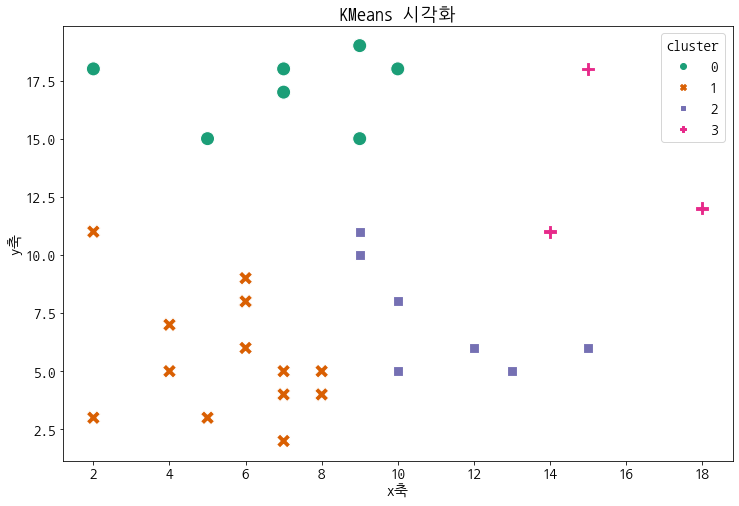

In [14]:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html => seaborn.scatterplot 공식 페이지
# 군집화된 결과를 hue 속성을 이용해 색깔로 구분한다. => 색상이 잘 구분되지 않으면 palette 속성으로 색상 팔레트를 지정한다.
# 색상 팔레트 이름
# BrBG, PiYG, PRGn, PuOr, RdBu, RdGy, RdYlBu, RdYlGn, Spectral, Accent, Dark2, Paired, Pastel1, Pastel2, Set1, Set2, Set3, 
# Blues, BuGn, # BuPu, GnBu, Greens, Greys, Oranges, OrRd, PuBu, PuBuGn, PuRd, Purples, RdPu, Reds, YlGn, YlGnBu, YlOrBr, 
# YlOrRd
# style 속성을 사용해 scatter 모양을 다양하게 표시할 수 있다.
plt.figure(figsize=[12, 8])
sns.scatterplot(data=df, x='x', y='y', s=200, hue='cluster', style='cluster', palette='Dark2')
plt.title('KMeans 시각화')
plt.xlabel('x축')
plt.ylabel('y축')
plt.show()